In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

C:\Users\Vijay\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data=pd.read_csv('G:\\DCU\Final Practicum\\Customer-Feedback-Analysis-master\\CNN\\CNN_EN\\training.tsv',sep='\t')

In [5]:
pd.set_option('max_colwidth', 1000)

data.head(2)

,tag,consumer_complaint_narrative
0,complaint,"The give me a room which was so smelly and the floor was wet, then they change me to another room which the power is not working the room, and had to wait 40 mins to change me to another room for the third time."
1,meaningless,"Unfortunately there was a mix up with my Passport and Visa, and I couldn't get through customs at Charles de Gaulle."


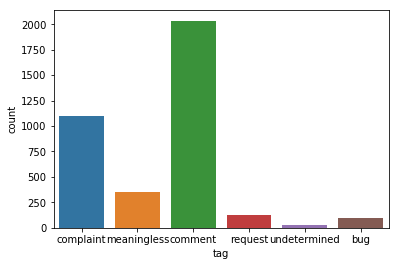

In [6]:
import seaborn as sns
sns.countplot(data.tag)

In [9]:
iv=data['consumer_complaint_narrative']
dv=data['tag']

In [13]:
lbl=LabelEncoder()
dv=lbl.fit_transform(dv)
dv=dv.reshape(-1,1)

In [15]:
iv_train,iv_test,dv_train,dv_test=train_test_split(iv,dv,test_size=0.25,random_state=False)

In [19]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(iv_train)
sequences = tok.texts_to_sequences(iv_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [22]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [23]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [24]:
model.fit(sequences_matrix,dv_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 2233 samples, validate on 559 samples
Epoch 1/10
2233/2233 [==============================] - 11s 5ms/step - loss: -5.3346 - acc: 0.5464 - val_loss: -10.7233 - val_acc: 0.5134
Epoch 2/10
2233/2233 [==============================] - 6s 3ms/step - loss: -9.0496 - acc: 0.5549 - val_loss: -10.7233 - val_acc: 0.5134


In [25]:
test_sequences = tok.texts_to_sequences(iv_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [26]:
accr = model.evaluate(test_sequences_matrix,dv_test)

931/931 [==============================] - 1s 1ms/step


In [27]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: -9.144
  Accuracy: 0.546
